In [1]:
import pandas as pd
import seaborn as sns

In [2]:
train = pd.read_csv("../data/minseok_EDA2_train.csv")
test = pd.read_csv("../data/minseok_EDA2_test.csv")

In [3]:
print(train.shape)
print(test.shape)

(15000, 69)
(35452, 68)


In [4]:
train.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,hand,religion,orientation,voted,married,familysize,ASD,nerdiness,Qs_Mach,age_cat
0,0.219430,0.684909,0.645424,0.689224,0.270300,0.580272,0.649525,0.664648,0.287443,0.462615,...,0.550968,0.567721,0.617225,0.549084,0.560104,0.547405,0.54676,1,3.653846,0.559000
1,0.549147,0.490676,0.505430,0.576165,0.538382,0.754382,0.494185,0.537294,0.460687,0.462615,...,0.552290,0.597924,0.521066,0.562683,0.515796,0.547405,0.54676,1,3.269231,0.523114
2,0.549147,0.684909,0.645424,0.576165,0.490014,0.754382,0.649525,0.664648,0.541905,0.523798,...,0.552290,0.597924,0.600253,0.549084,0.529865,0.547405,0.54676,1,3.692308,0.523114
3,0.549147,0.490676,0.505430,0.382335,0.538382,0.427424,0.435168,0.664648,0.460687,0.523798,...,0.550968,0.565894,0.521066,0.549084,0.560104,0.565604,0.54676,1,3.500000,0.564478
4,0.549147,0.490676,0.505430,0.576165,0.490014,0.427424,0.494185,0.413060,0.460687,0.523798,...,0.550968,0.567721,0.521066,0.549084,0.560104,0.573536,0.54676,0,3.461538,0.564478


In [5]:
train.columns

Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
       'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'introelapse', 'testelapse',
       'surveyelapse', 'TIPI1', 'TIPI2', 'TIPI3', 'TIPI4', 'TIPI5', 'TIPI6',
       'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10', 'VCL1', 'VCL2', 'VCL3', 'VCL4',
       'VCL5', 'VCL6', 'VCL7', 'VCL8', 'VCL9', 'VCL10', 'VCL11', 'VCL12',
       'VCL13', 'VCL14', 'VCL15', 'VCL16', 'education', 'urban', 'gender',
       'engnat', 'hand', 'religion', 'orientation', 'voted', 'married',
       'familysize', 'ASD', 'nerdiness', 'Qs_Mach', 'age_cat'],
      dtype='object')

In [9]:
from pycaret.classification import *

In [10]:
clf = setup(data = train, target = 'nerdiness')

,Description,Value
0,session_id,7331
1,Target,nerdiness
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(15000, 69)"
5,Missing Values,True
6,Numeric Features,49
7,Categorical Features,19
8,Ordinal Features,False
9,High Cardinality Features,False


In [11]:
best_3 = compare_models(sort = 'AUC', n_select = 3, fold = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7623,0.8504,0.8251,0.7642,0.7935,0.5144,0.5165,0.1620
rf,Random Forest Classifier,0.7657,0.8467,0.8272,0.7676,0.7962,0.5215,0.5236,0.1640
catboost,CatBoost Classifier,0.7566,0.8275,0.8212,0.7589,0.7888,0.5028,0.5050,1.0280
xgboost,Extreme Gradient Boosting,0.7563,0.8242,0.8019,0.7679,0.7845,0.5043,0.5049,0.4220
lightgbm,Light Gradient Boosting Machine,0.7519,0.8190,0.8148,0.7559,0.7842,0.4933,0.4953,0.1720
gbc,Gradient Boosting Classifier,0.7362,0.8068,0.8055,0.7405,0.7716,0.4606,0.4629,0.4540
lda,Linear Discriminant Analysis,0.7292,0.7992,0.7869,0.7403,0.7628,0.4480,0.4492,0.0520
lr,Logistic Regression,0.7305,0.7988,0.7883,0.7413,0.7640,0.4507,0.4519,0.6880
ada,Ada Boost Classifier,0.7196,0.7934,0.7921,0.7262,0.7576,0.4265,0.4288,0.1320
nb,Naive Bayes,0.6934,0.7495,0.7458,0.7135,0.7292,0.3763,0.3769,0.4640


In [12]:
blended = blend_models(estimator_list = best_3, fold = 5, method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7848,0.8564,0.8485,0.7813,0.8135,0.5600,0.5627
1,0.7648,0.8483,0.8348,0.7626,0.7970,0.5187,0.5217
2,0.7695,0.8476,0.8322,0.7699,0.7998,0.5292,0.5314
3,0.7662,0.8607,0.8330,0.7652,0.7977,0.5219,0.5246
4,0.7761,0.8579,0.8511,0.7691,0.8080,0.5411,0.5451
Mean,0.7723,0.8542,0.8399,0.7696,0.8032,0.5342,0.5371
SD,0.0074,0.0053,0.0082,0.0064,0.0065,0.0150,0.0151


In [13]:
pred_holdout = predict_model(blended)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.7547,0.8370,0.7441,0.7992,0.7707,0.5078,0.5093


In [14]:
final_model = finalize_model(blended)

In [15]:
predictions = predict_model(final_model, data = test)

In [17]:
submission = pd.read_csv("../data/sample_submission.csv")

In [18]:
submission.head()

,index,nerdiness
0,0,-1
1,1,-1
2,2,-1
3,3,-1
4,4,-1


In [19]:
submission['nerdiness'] = predictions['Label']

In [20]:
submission['nerdiness'].nunique()

2

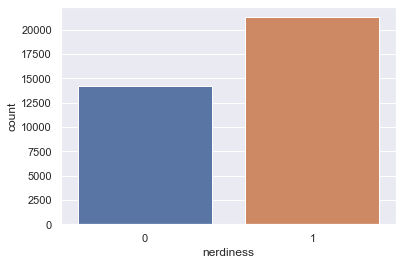

In [21]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="nerdiness", data=submission)

In [22]:
submission.to_csv('../submission/auto_minseok2.csv', index = False)